# PCA with Cary5000 data for full spectra (190-2500 nm)

In [1]:
# Import packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from mpl_toolkits import mplot3d

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

plt.style.use('ggplot')

# Set seed
seed = 4

In [2]:
# Import data
data = pd.read_csv('Datasets/urea_saline_cary5000.csv')

In [3]:
# Define features and targets
X = data.drop(data.columns[0:4], axis=1)
y = data['Urea Concentration (mM)']

In [4]:
# Normalize data
sc = StandardScaler()
X = sc.fit_transform(X)

In [21]:
# Do PCA
pca = PCA(n_components=10, random_state=seed)
X_pca = pca.fit_transform(X)

print("Variance explained by all 10 PC's =", sum(pca.explained_variance_ratio_ *100))

Variance explained by all 10 PC's = 99.99781255594658


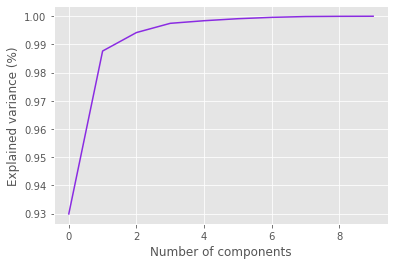

In [28]:
# Elbow Plot
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='blueviolet')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (%)')
plt.savefig('elbow_plot.png', dpi=100)

In [7]:
np.cumsum(pca.explained_variance_ratio_)

array([0.91317014, 0.98727238, 0.99260967, 0.99690698, 0.99813307,
       0.99914239, 0.99949654, 0.99975784, 0.99990109, 0.99994005])

Text(0, 0.5, 'Second principal component')

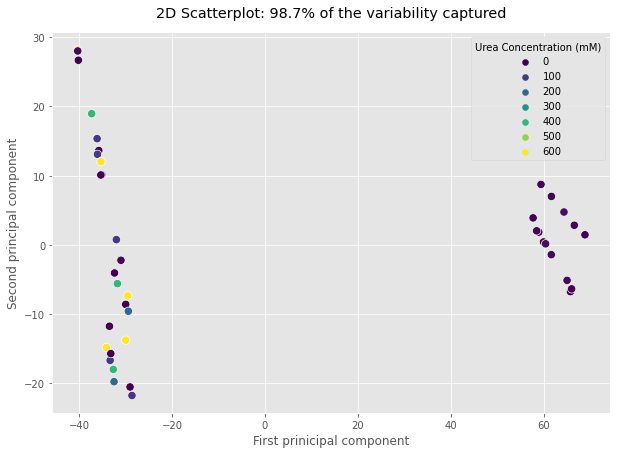

In [9]:
# If we apply PCA with n_components=2
pca_2 = PCA(n_components=2, random_state=seed)
X_pca_2 = pca_2.fit_transform(X)


# Plot it
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca_2[:, 0], y=X_pca_2[:, 1], s=70,
               hue=y, palette='viridis')

plt.title('2D Scatterplot: 98.7% of the variability captured', pad=15)
plt.xlabel('First prinicipal component')
plt.ylabel('Second principal component')

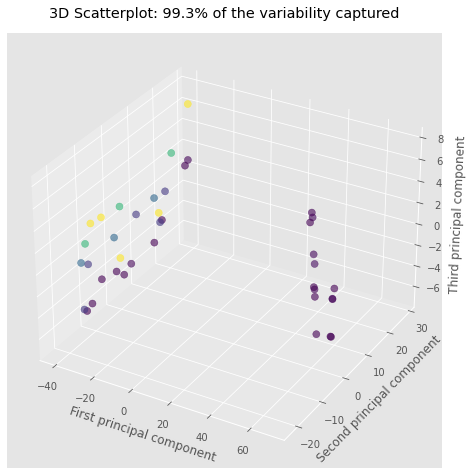

In [10]:
# Plot it in 3D
pca_3 = PCA(n_components=3, random_state=seed)
X_pca_3 = pca_3.fit_transform(X)

fig = plt.figure(figsize = (12, 8))
ax = plt.axes(projection='3d')

sctt = ax.scatter3D(X_pca_3[:, 0], X_pca_3[:, 1], X_pca_3[:, 2],
                   c = y, s=50, alpha=0.6)

plt.title('3D Scatterplot: 99.3% of the variability captured', pad=15)
ax.set_xlabel('First principal component')
ax.set_ylabel('Second principal component')
ax.set_zlabel('Third principal component')
plt.savefig('3d_scatterplot.png')

## Drop outliers - data from 02/11/2022

In [18]:
data = pd.read_csv('Datasets/urea_saline_cary5000.csv')
data = data.drop(data.index[17:29])
data.reset_index(inplace=True)

Variance explained by all 10 PC's = 99.99781255594658


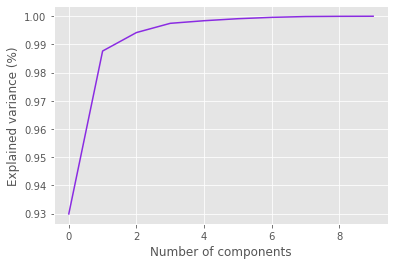

In [20]:
# Define features and targets
X = data.drop(data.columns[0:5], axis=1)
y = data['Urea Concentration (mM)']

# Normalize data
sc = StandardScaler()
X = sc.fit_transform(X)

# Do PCA
pca = PCA(n_components=10, random_state=seed)
X_pca = pca.fit_transform(X)

print("Variance explained by all 10 PC's =", sum(pca.explained_variance_ratio_ *100))

# Elbow Plot
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='blueviolet')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (%)')
plt.savefig('elbow_plot.png', dpi=100)

In [22]:
np.cumsum(pca.explained_variance_ratio_)

array([0.92985452, 0.98764022, 0.99419017, 0.99746544, 0.99838917,
       0.99910401, 0.99958155, 0.99987381, 0.99994962, 0.99997813])

Text(0, 0.5, 'Second principal component')

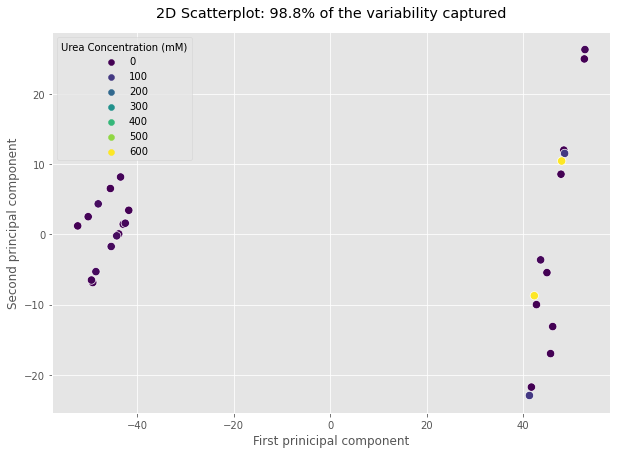

In [25]:
# If we apply PCA with n_components=2
pca_2 = PCA(n_components=2, random_state=seed)
X_pca_2 = pca_2.fit_transform(X)


# Plot it
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca_2[:, 0], y=X_pca_2[:, 1], s=70,
               hue=y, palette='viridis')

plt.title('2D Scatterplot: 98.8% of the variability captured', pad=15)
plt.xlabel('First prinicipal component')
plt.ylabel('Second principal component')

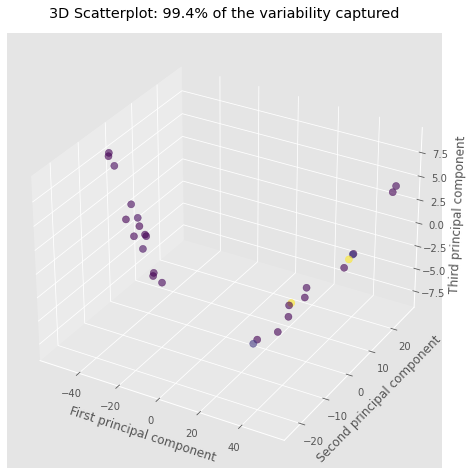

In [26]:
# Plot it in 3D
pca_3 = PCA(n_components=3, random_state=seed)
X_pca_3 = pca_3.fit_transform(X)

fig = plt.figure(figsize = (12, 8))
ax = plt.axes(projection='3d')

sctt = ax.scatter3D(X_pca_3[:, 0], X_pca_3[:, 1], X_pca_3[:, 2],
                   c = y, s=50, alpha=0.6)

plt.title('3D Scatterplot: 99.4% of the variability captured', pad=15)
ax.set_xlabel('First principal component')
ax.set_ylabel('Second principal component')
ax.set_zlabel('Third principal component')
plt.savefig('3d_scatterplot.png')